In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit

exp_data = np.loadtxt(fname="NaCl-experiment.txt",delimiter=",")

# experimental XRD peaks
theta2 = [27.40, 31.73, 45.47, 53.89, 56.49, 
         66.24, 73.08, 75.31, 84.00, 84.00] 

I = [8.77, 100.00, 61.00, 2.21, 18.23,
          7.42, 1.06, 18.39, 12.69, 12.69]

I = [i/max(I) for i in I]
# raw XRD data
rawI = exp_data[:][:,1]
rawtheta2 = exp_data[:][:,0]

rawI/=np.max(rawI)

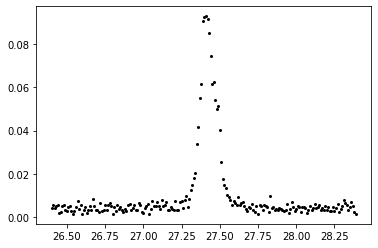

In [13]:
# take the first peak, find it in the raw exp. data 
elem = np.where(rawtheta2 == theta2[0])[0][0]
# take the data surrounding the first peak for a gaussian fit
N = 100 
tmpx = np.array(rawtheta2[elem-N:elem+N])
tmpy = np.array(rawI[elem-N:elem+N])
# plot the data
plt.plot(tmpx,tmpy,'ko', ms=2)
plt.show()

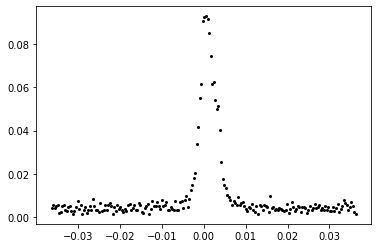

In [14]:
# normalize the 2theta values
# tmpx = [i/np.mean(tmpx)-1 for i in tmpx]
tmpx = tmpx/np.mean(tmpx) - 1
plt.plot(tmpx,tmpy,'ko', ms=2)
plt.show()

In [15]:
def gauss(data, fwhm, maxI):
    global max_theta
    tmp = ((data - max_theta)/fwhm)**2
    return maxI * np.exp(-4*np.log(2)*tmp) 
def triangle(r,l=0.6):
    return 1 - np.abs(r)/l

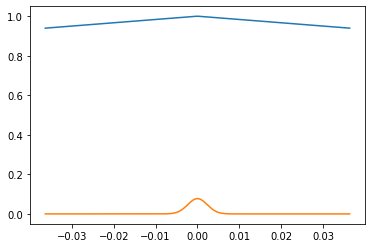

In [16]:
# fit to our gaussian function and attach weighting function
max_theta = 0
popt, pcov = curve_fit(gauss, tmpx, tmpy, p0=[0.2,I[0]])
plt.plot(tmpx,triangle(tmpx))
plt.plot(tmpx,gauss(tmpx, *popt))
plt.show()